# Titanic Data Analysis

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Problem Statement : “What sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
print("Number of passengers: %d"%len(df))

Number of passengers: 887


## Analyzing Data

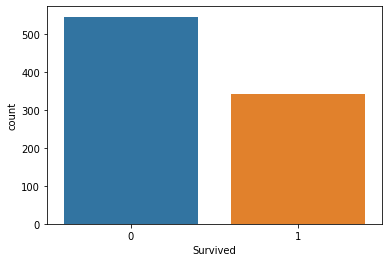

In [4]:
sns.countplot(x='Survived',data=df)

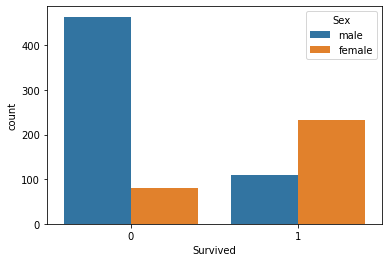

In [5]:
sns.countplot(x='Survived',hue='Sex',data=df)

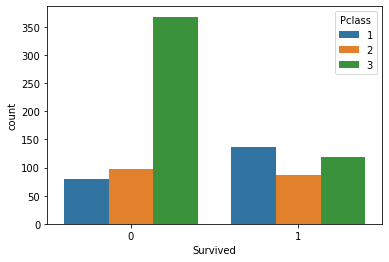

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=df)

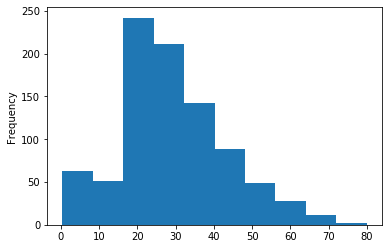

In [7]:
df['Age'].plot.hist()

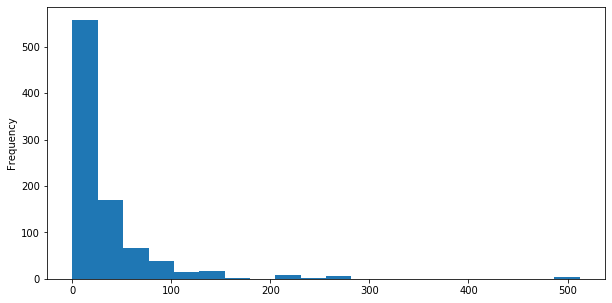

In [8]:
df['Fare'].plot.hist(bins=20,figsize=(10,5))

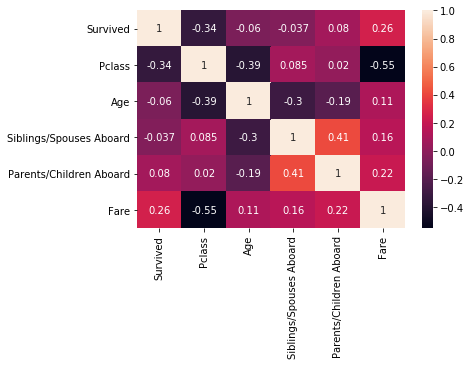

In [9]:
sns.heatmap(df.corr(),annot=True)

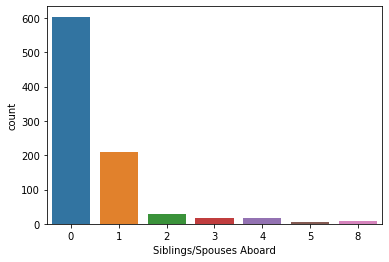

In [10]:
sns.countplot(x="Siblings/Spouses Aboard",data=df)

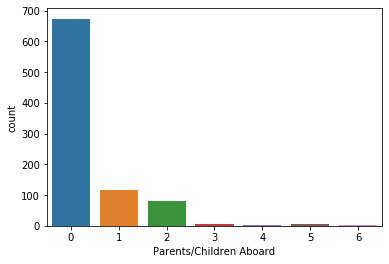

In [11]:
sns.countplot(x="Parents/Children Aboard",data=df)

## Data Wrangling

In [12]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

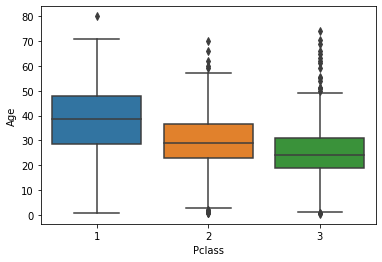

In [13]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [14]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [15]:
Pcl=pd.get_dummies(df['Pclass'],drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [16]:
df=pd.concat([df,sex,Pcl],axis=1)

In [17]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [18]:
df.drop(['Sex','Name','Pclass'],axis=1,inplace=True)

In [19]:
df.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


## Train Data

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
pre=lg.predict(x_test)

## Accuracy

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
classification_report(y_test,pre)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81       162\n           1       0.70      0.70      0.70       105\n\n    accuracy                           0.77       267\n   macro avg       0.76      0.76      0.76       267\nweighted avg       0.77      0.77      0.77       267\n'

In [39]:
confusion_matrix(y_test,pre)

array([[131,  31],
       [ 31,  74]], dtype=int64)

In [35]:
accuracy_score(y_test,pre)*100

76.77902621722846